# ⬅️ Backpropagation


Our main goal for this lab is to have you implement a neural network from scratch. The core of your work will be implementing the backpropagation algorithm:


- Given is a network with $L$ layers we have $L$ weight matrices $(W^{(1)},W^{(2)},...,W^{(L)})$ and $L$ bias vectors $(b^{(1)},b^{(2)},...,b^{(L)})$ as we have shown earlier

- The goal of backpropagation is to find $\frac{\partial J}{\partial W}$ and $\frac{\partial J}{\partial b} $ for all the weights and biases in the network; this way we can train our neural network using gradient descent as demonstrated earlier.

In the following we write the final expressions an algorithm for backpropagation for cross-entropy loss. Unlike the lecture we will use $A^{(l)}$ instead of $Y^{(l)}$ for the output vector of layer $l$ and use $Z^{(l)}$ instead of $X^{(l)}$ for the outputs of layer $l$ before the activation (i.e., $Z^{(l)} = WY^{(l-1)}+b^l$)

- It trivially holds for any weight matrix $W$ (or bias vector $b$):

$$\frac{\partial J}{\partial W} = \sum_{m} \frac{\partial J_m}{∂ W} \;\;  \text{where} \;\; J_m \;\; \text{is the loss function for one point} \;\; (x_m,y_m)$$

- For $W^{(L)}$ and $b^{(L)}$ (i.e., last weight matrix/bias vector only) we have:

<font color="aqua">

$$\frac{\partial J_m}{\partial Z^{(L)}} = (A^{(L)} - y_m)  $$

</font>

$$\frac{\partial J_m}{\partial W^{(L)}} = \frac{\partial J_m}{\partial Z^{(L)}}  (A^{(L-1)})^T \quad \text{and} \quad \frac{\partial J_m}{\partial b^{(L)}} = \frac{\partial J_m}{\partial Z^{(L)}}$$

<br>

- Meanwhile, for any arbitrary weight matrix $W^{(l)}$ and bias vector $b^{(l)}$ we have:

<font color="aqua">

$$\frac{\partial J_m}{\partial Z^{(l)}} = ((W^{(l+1)})^T \frac{\partial J_m}{\partial Z^{(l+1)}} ) * h'(Z^{(l)})  $$

</font>

$$\frac{\partial J_m}{\partial W^{(l)}} = \frac{\partial J_m}{\partial Z^{(l)}} \; (A^{(l-1)})^T \quad \text{and} \quad \frac{\partial J_m}{\partial b^{(l)}} =  \frac{\partial J_m}{\partial Z^{(l)}}$$


- It doesn't require black magic to derive these (just prerequisites, logic and following the lecture).

<br>

Suppose we define $δ^{(L)} = \frac{\partial J_m}{\partial Z^{(l)}}$ then we can rewrite the equations above as:

<font color="aqua">

$$δ^{(l)} = (A^{(L)} - y_m) \quad \text{if}\quad l==L \quad{else}\quad (W^{(l+1)})^T δ^{(l+1)} * h'(Z^{(l)})  $$

</font>

$$\frac{\partial J_m}{\partial W^{(l)}} = δ^{(l)} (A^{(l-1)})^T \quad \text{and} \quad \frac{\partial J_m}{\partial b^{(l)}} = δ^{(l)} $$


where for $l=1$ (i.e., first layer) we use the input (i.e., $x$) as the previous layer activations $A^{(l-1)}$


Thus, it becomes obvious that the backpropagation algorithm to compute $\frac{\partial J_m}{\partial W^{(l)}} \;\; \text{and } \;\; \frac{\partial J_m}{\partial b^{(l)}}$ for each layer $l$ given a single point $(x_m, y_m)$:


<font color="pink">

$\text{Backpropagation Algorithm}:$

</font>

$\text{1. Compute} \; Z^{(l)} \; \text{and} \; A^{(l)} \text{for each layer } \; l∈\{1,2,...,L\} \; \text{by passing the point onto the network}$

$\text{2. Compute} \; δ^{(L)} = (A^{(L)} - y_m) \; \text{and then} \; \frac{\partial J_m}{\partial W^{(L)}} = δ^{(L)} (A^{(L-1)})^T \;\; \text{and} \;\; \frac{\partial J_m}{\partial b^{(L)}} =  δ^{(L)} \; \text{for the last layer}$

$\text{3. Compute} \; δ^{(l)} = ((W^{(l+1)})^T δ^{(l+1)}) * h'(Z^{(l)}) \; \text{and then} \; \frac{\partial J_m}{\partial W^{(l)}} = δ^{(l)} (A^{(l-1)})^T \;\; \text{and} \;\; \frac{\partial J_m}{\partial b^{(l)}} =  δ^{(l)} \; \text{for the remaining layers} \; l∈\{L-1, ..., 2, 1\}$


<font color="pink"> Note that: </font>

- The first step where we compute $Z^{(l)}$ and $A^{(l)}$ for each layer $l$ as we will need them for the derivatives is called the forward pass.

- The second and third step where we computed the needed derivatives are called the backward pass. It must go backward because $δ^{(l)}$ depends on $δ^{(l+1)}$ except for the base case of $δ^{(L)}$

  - This is also why the algorithm is called "backpropagation".

- The fourth step, exterior to the algorithm, is to pass the derivatives to gradient descent so that it can perform it's weight update given the point(s) $(x_m, y_m)$


### 🧠 Neural Network from Scratch


- Now go to `Backprop.py` to implement an arbitrary neural network from scratch (including backpropagation) after reading the following:

```python
def __init__(self, structure, activation='relu', random_state=42)
```

- This function is responsible for making the neural network given the `structure`. For instance, if the user passes for the structure `[3, 4, 5, 1]` then our network has four layers with 3, 4, 5, 2 neurons respectively. We will leave it to the user to make sure that `3` is indeed the size of their input (i.e., number of features) and that `1` is the size of their output.

- The `activation` denotes the activation function of each layer except the last one (will be always sigmoid since this is a binary classification network)

- This constructor will as well randomly initialize all the weights and biases in the network

<br>

```python
def feedforward(self, x, store_outputs=False):
```

- Pass the input `x` to the network and returns the output of the network (i.e., output of the last layer)

- Optionally, it can store the `Z` and `A` for each layer because they will be needed if this is called for the sake of backpropagation
  <br>

```python
def backprop(self, xₘ , yₘ):
```

- Applies the backpropagation algorithm given a point as described above
  <br>

```python
def SGD(self, x_batch, y_batch, α):
```

- Takes a random sample of data `(x_batch, y_batch)` and learning rate `α` then gets the derivative given each point in that sample

- Then applies gradient descent over this random sample using its derivative to update the weight matrix and bias vector of all layers in the network

- To make sense of this, recall:

$$\frac{\partial J}{\partial W} = \sum_{m} \frac{\partial J_m}{∂ W} \;\;  \text{where} \;\; J_m \;\; \text{is the loss function for one point} \;\; (x_m,y_m)$$

<br>

```python
def fit(self, x_train, y_train, batch_size=32, epochs=200, α=0.03, eval_train=False):
```

- Given training data it splits it into random samples of data (batches) of size `batch_size` then applies gradient descent with learning rate `α` for `epochs` iterations.

- Optionally, it can evaluate the model on the training data after each epoch.

- UPDATE: These training hyperparameters have been moved to `init` for easier access from the plot function

<br>

```python
def predict(self, x_val):
```

- Predict the label of each point in `x_val` by getting the network output of each (probability) then rounding it

<br>

```python
def score(self, x_val, y_val):
```

- Call `predict` to get `y_pred` then compute accuracy by comparing with `y_val`

<br>


## 🧪 Tests


In [1]:
import numpy as np
from Backprop import ClassificationNeuralNet

The following are some light tests that can help you during the implementation. Feel free to extend them.


In [2]:
import numpy as np

def test_init():
    structure = [2, 3, 1]  # Example structure
    net = ClassificationNeuralNet(structure)

    # Check if number of layers is correct
    assert len(net.Wₙ) == len(structure) - 1
    assert len(net.Bₙ) == len(structure) - 1

    # Check shapes of weight matrices and bias vectors
    for i in range(len(net.Wₙ)):
        W = net.Wₙ[i]
        B = net.Bₙ[i]
        n_l, n_l_prev = structure[i+1], structure[i]
        
        assert W.shape == (n_l, n_l_prev)
        assert B.shape == (n_l, 1)

test_init()

In [3]:
def test_feedforward():
    structure = [2, 3, 4]  # Example structure
    net = ClassificationNeuralNet(structure)

    x = np.random.rand(2, 1)  # Example input

    # Perform forward pass
    ŷ, Zₙ, Aₙ = net.feedforward(x, store_outputs=True)

    # Check output shape
    assert ŷ.shape == (4, 1)

    # Check shapes of stored outputs
    assert len(Zₙ) == len(net.Wₙ)
    assert len(Aₙ) == len(net.Wₙ)
    
test_feedforward()

In [3]:
def test_backprop():
    structure = [2, 3, 1]  # Example structure
    net = ClassificationNeuralNet(structure)

    x = np.random.rand(2, 1)  # Example input
    y = np.random.rand(1, 1)  # Example output

    # Perform backpropagation
    მBₙ, მWₙ = net.backprop(x, y)

    # Ensure derivative exists for every single parameter
    assert len(მBₙ) == len(net.Bₙ)
    assert len(მWₙ) == len(net.Wₙ)
    for მB, მW, n_l, n_l_prev in zip(მBₙ, მWₙ, structure[1:], 
                                       structure[:-1]):
        assert მB.shape == (n_l, 1)
        assert მW.shape == (n_l, n_l_prev)

test_backprop()

**The Ultimate Test:** your model should accuracy 1.0 (or too close) and have a great nonlienar fit:


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import  make_moons

model = ClassificationNeuralNet([2, 100, 1], activation='relu', eval_train=True, )
x_data, y_data = make_moons(n_samples=2000, random_state=42, noise=0.1)

x_train, x_val, y_train, y_val = train_test_split(x_data, y_data, test_size=0.2, random_state=42)
model.fit(x_train, y_train)

model.score(x_val, y_val)

Train Acc: 1.0: 100%|██████████| 20/20 [00:06<00:00,  3.31it/s]


1.0

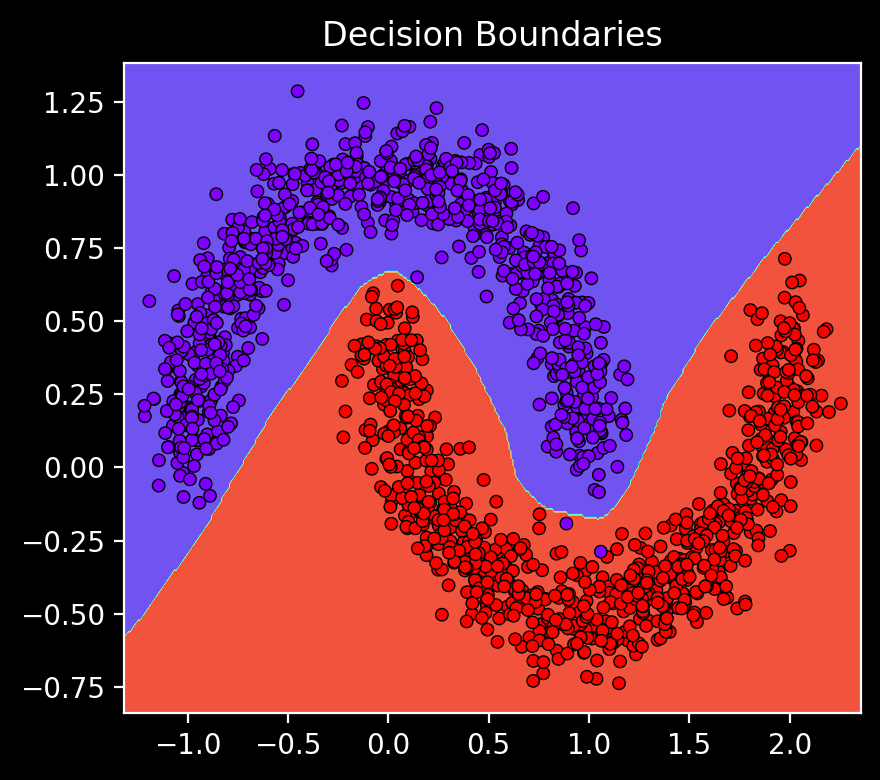

In [5]:
from Plot import plot_model_contours

plot_model_contours(model, x_train, y_train, trained=True)

## 😎 Machine Learning Goggles in Place!


Although neural networks outperform classical machine learning models in many facets, the sheer number of hyperparameters makes them harder to tune.

#### We have to choose the following structure hyperparameters:

- Number of neurons per each layer

- Number of layers

- Activation function for hidden layers

#### As well as the following optimization hyperparameters

- Optimization algorithm (here we use gradient descent)

- Loss function (here we use cross-entropy loss for classification)

- Learningr rate α

- Batch size (random sample size for gradient descent)

- Number of epochs (number of gradient descent iterations over dataset)

... and even more that you will see in the future.


####


### ⭐ Analyzing Number of Neurons per Layer


Hyperparameters:  50%|█████     | 4/8 [00:26<00:25,  6.42s/it]e:\NN_University\Lab 6\Backprop.py:14: RuntimeWarning: overflow encountered in exp
  def σ(z): return 1/(1+np.exp(-z))
Hyperparameters: 100%|██████████| 8/8 [01:35<00:00, 11.90s/it]


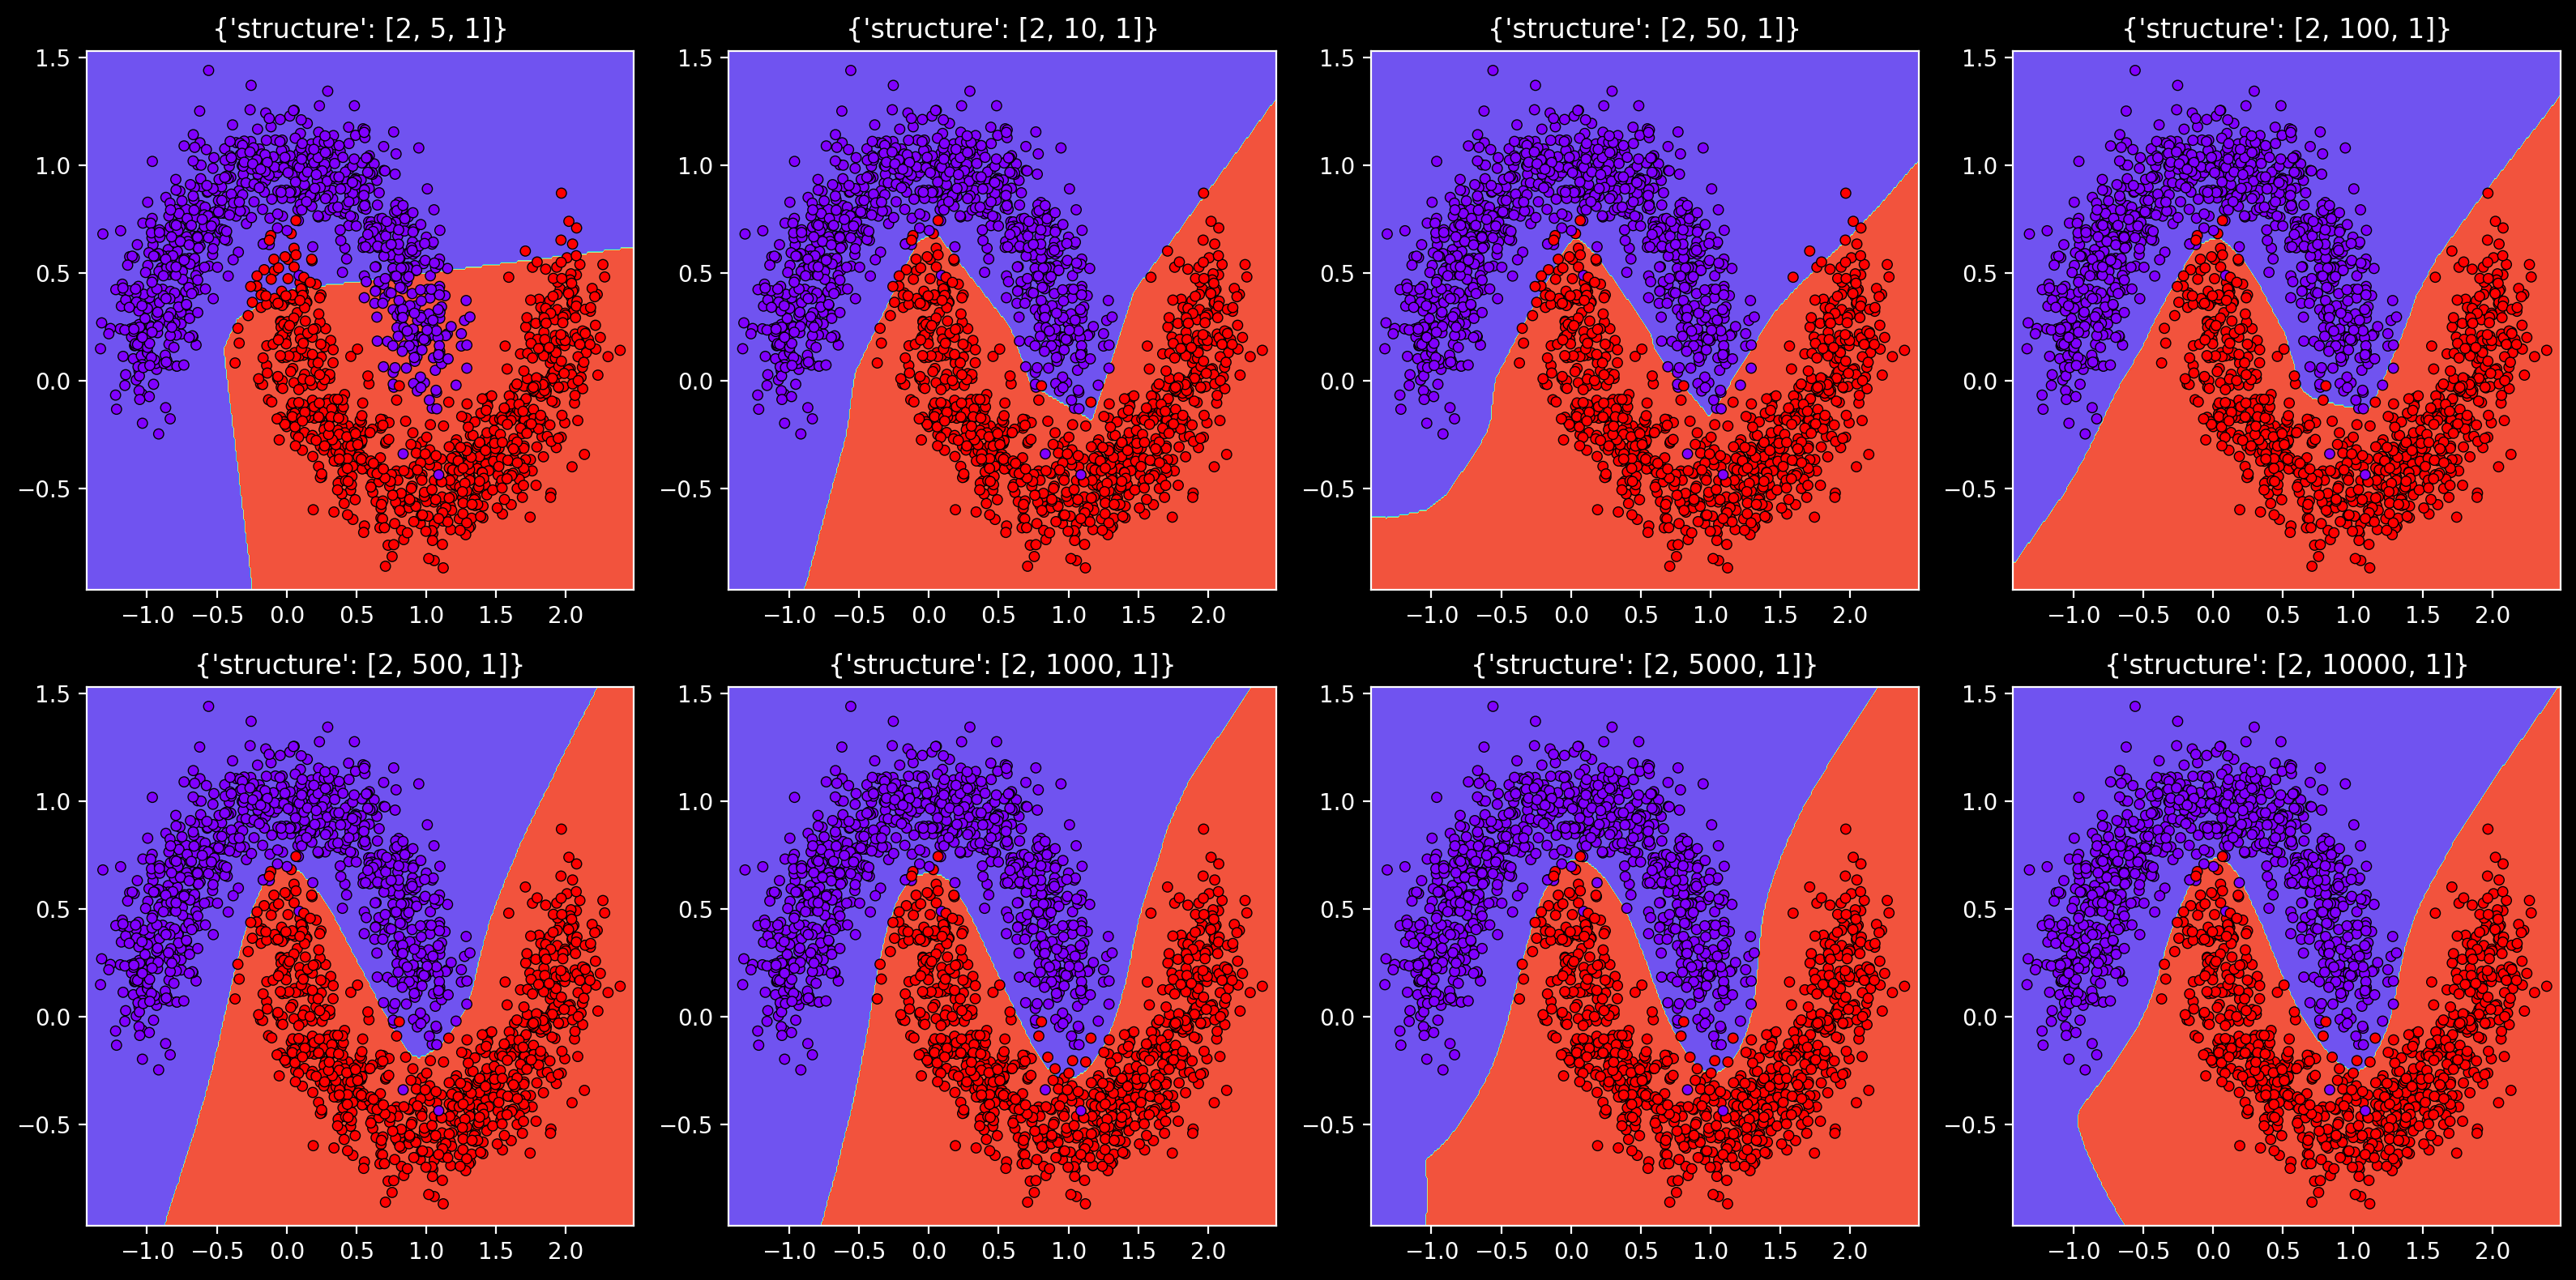

In [6]:
from Plot import plot_model_contours

x_data, y_data = make_moons(n_samples=2000, random_state=42, noise=0.15)

x_train, x_val, y_train, y_val = train_test_split(x_data, y_data, test_size=0.2, random_state=42)

hyperparameter_list = [
    {"structure": [2, 5, 1]},
    {"structure": [2, 10, 1]},
    {"structure": [2, 50, 1]},
    {"structure": [2, 100, 1]},
    {"structure": [2, 500, 1]},
    {"structure": [2, 1000, 1]},
    {"structure": [2, 5000, 1]},
    {"structure": [2, 10000, 1]},
]

plot_model_contours(ClassificationNeuralNet, x_train, y_train, hyperparams_list=hyperparameter_list)

Theoretically, adding more neurons to a layer makes the approximation to the original function better by adding more nonlinear elements that combine together at the same order of nonlinearity. However, too many neurons can make us overfit by approximating noise as well.

```python
In light of this, explain what happened above as we increased the number of neurons in the hidden layer. Which number is the most optimal?
```


In [ ]:
'''
optimal is 100
'''

### ⭐ Analyzing the number of hidden layers


Hyperparameters:  25%|██▌       | 1/4 [00:09<00:28,  9.65s/it]e:\NN_University\Lab 6\Backprop.py:14: RuntimeWarning: overflow encountered in exp
  def σ(z): return 1/(1+np.exp(-z))
Hyperparameters:  75%|███████▌  | 3/4 [00:34<00:11, 11.66s/it]e:\NN_University\Lab 6\Backprop.py:54: RuntimeWarning: overflow encountered in matmul
  z = W@a+b
Hyperparameters: 100%|██████████| 4/4 [00:49<00:00, 12.46s/it]


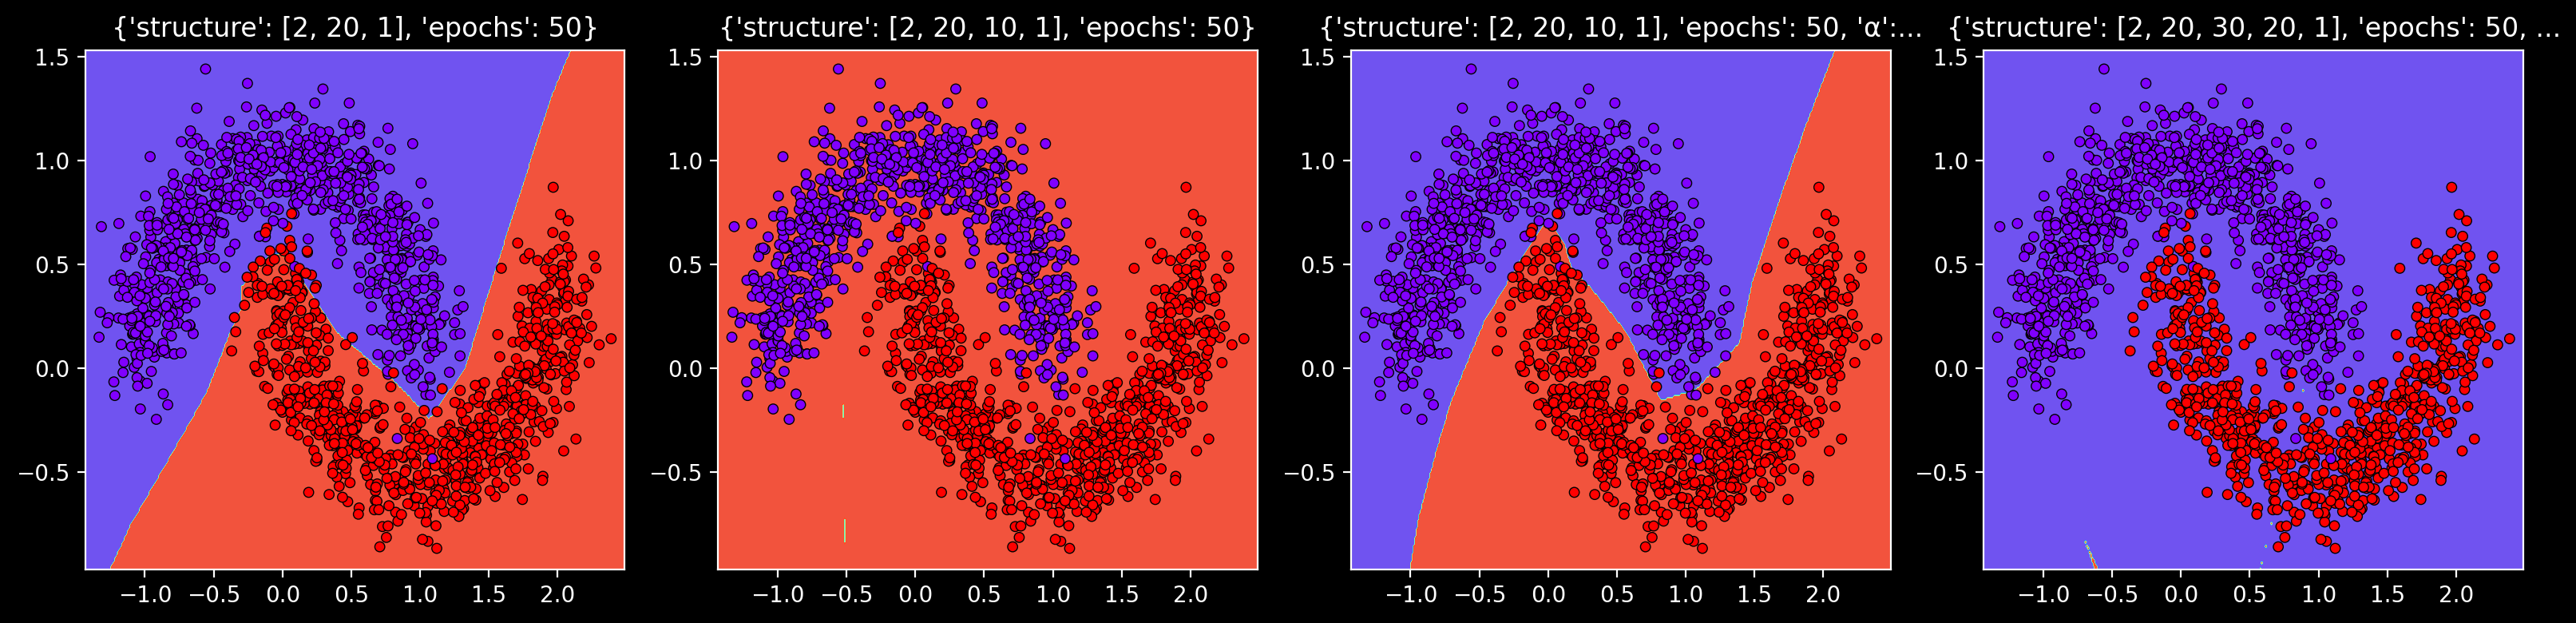

In [7]:
from Plot import plot_model_contours

hyperparameter_list = [
    {"structure": [2, 20, 1], "epochs": 50},
    {"structure": [2, 20, 10, 1], "epochs": 50,},
    {"structure": [2, 20, 10, 1], "epochs": 50, "α": 0.005},
    {"structure": [2, 20, 30, 20, 1], "epochs": 50, "α": 0.0008},
]

model = ClassificationNeuralNet(structure=[2, 30, 2, 1], epochs=50)

plot_model_contours(ClassificationNeuralNet, x_train, y_train, hyperparams_list=hyperparameter_list)

Theoretically, adding more layers makes the approximation to the original function better by increasing the order of nonlinearity: for instance, with one hidden layer, the basic unit used to approximate the function is a simple curve that's weightedly combined to approximate the function; meanwhile, by adding a layer we make the basic unit used in the approximation become even more complex, so it can attain overall more complex fits.

However, too many neurons can make us overfit by approximating noise as well.

```python
In light of this, explain what happened above as we increased the number of hidden layers. Which number is the most optimal? Suppose we are modelling very complex data such as images or audio then do you think it would be better to add more neurons or more layers?
```


In [ ]:
'''
use more layes for complex data
2 layers here is good
'''

```python
In light of the experiment above, does changing a structure hyperparameter such as the number of hidden layers affect convergence properties? Why do you think a lower learning rate is better when using more layers?
```


In [ ]:
'''
Each extra layer makes the network deeper
If α is too high, weight updates can be unstable (overshooting)
'''

### ⭐ Analyzing Activation Function


Hyperparameters: 100%|██████████| 3/3 [00:41<00:00, 13.94s/it]


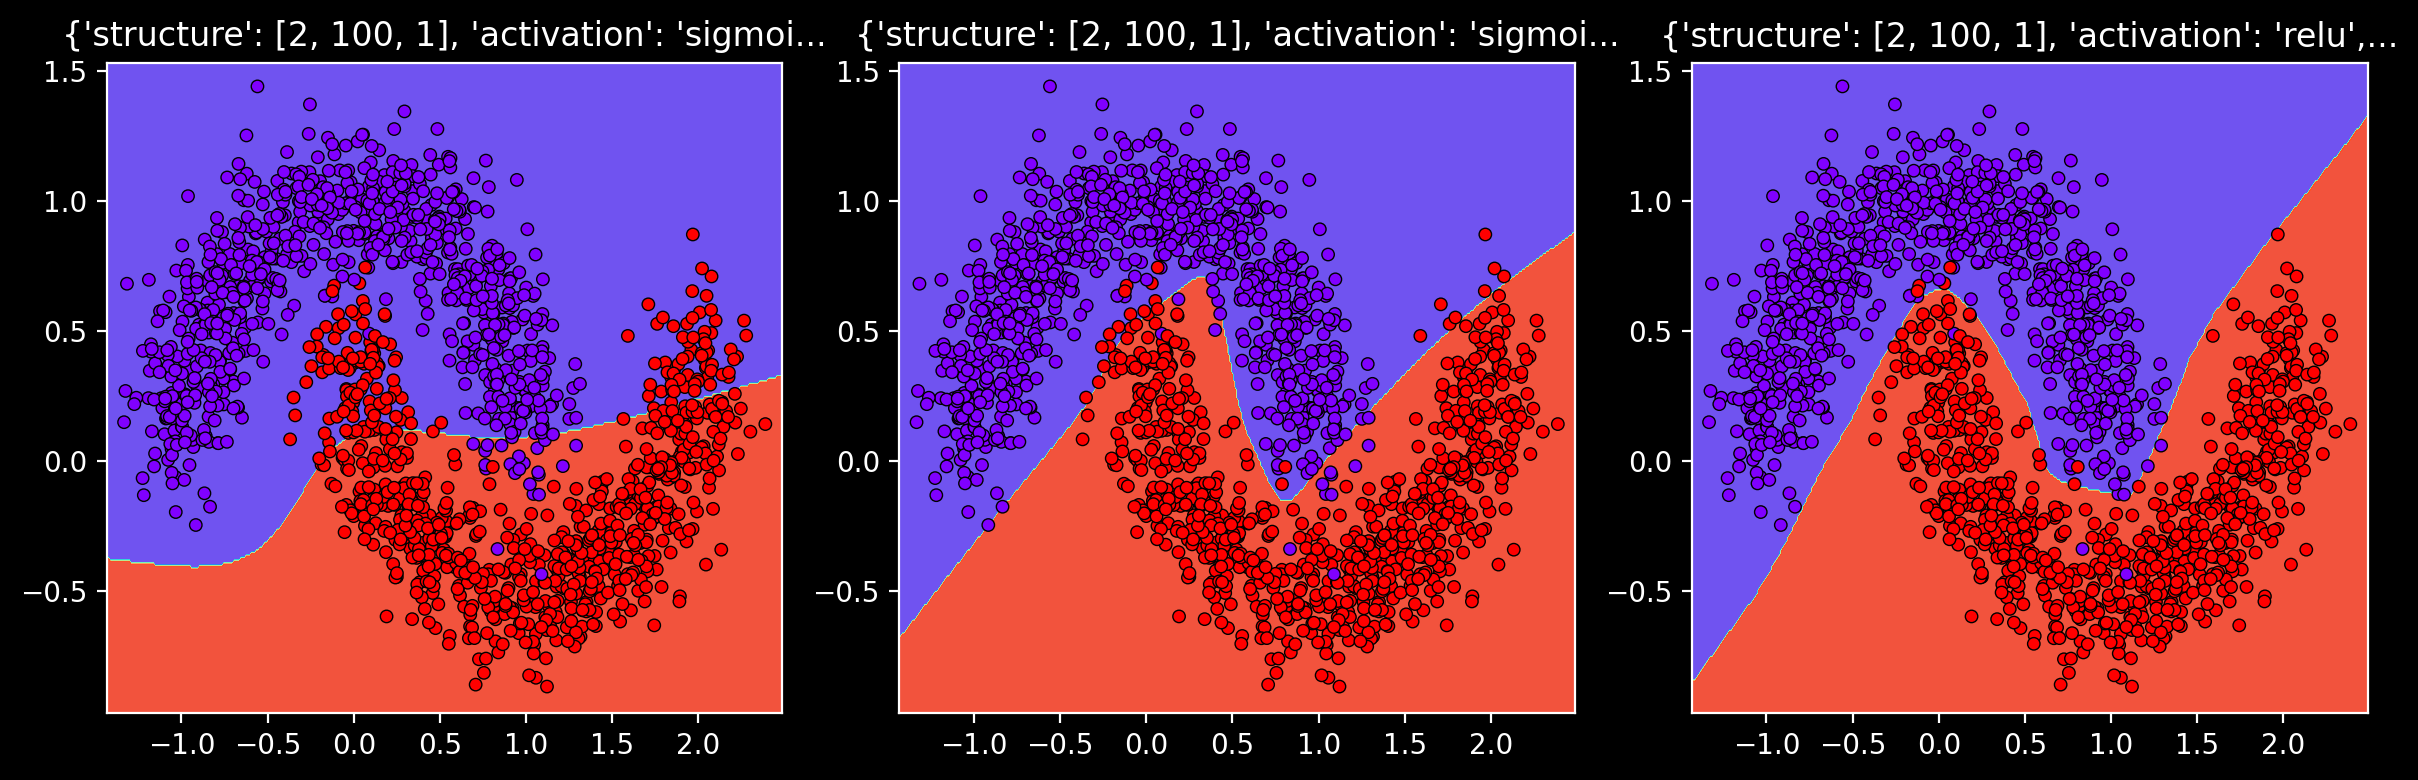

In [8]:
from Plot import plot_model_contours

hyperparameter_list = [
    {"structure": [2, 100, 1], "activation": "sigmoid", "epochs": 20},
    {"structure": [2, 100, 1], "activation": "sigmoid", "epochs": 120},
    {"structure": [2, 100, 1], "activation": "relu", "epochs": 20},
]

plot_model_contours(ClassificationNeuralNet, x_train, y_train, hyperparams_list=hyperparameter_list)

```python
State one reason from the lecture justifying why ReLU yields faster convergence
```


In [ ]:
'''
Answer goes here
'''

### ⭐ Analyzing Learning Rate


Hyperparameters:  60%|██████    | 3/5 [00:32<00:21, 10.54s/it]e:\NN_University\Lab 6\Backprop.py:14: RuntimeWarning: overflow encountered in exp
  def σ(z): return 1/(1+np.exp(-z))
e:\NN_University\Lab 6\Backprop.py:54: RuntimeWarning: overflow encountered in matmul
  z = W@a+b
e:\NN_University\Lab 6\Backprop.py:81: RuntimeWarning: overflow encountered in multiply
  δ = (Aₙ[l] - yₘ) if l==H else np.dot(self.Wₙ[l+1].T, δ) * self.h(Zₙ[l])
e:\NN_University\Lab 6\Backprop.py:106: RuntimeWarning: invalid value encountered in add
  მJⳆმWₙ[l] += მJⳆმWₙₘ[l]
Hyperparameters: 100%|██████████| 5/5 [00:45<00:00,  9.05s/it]


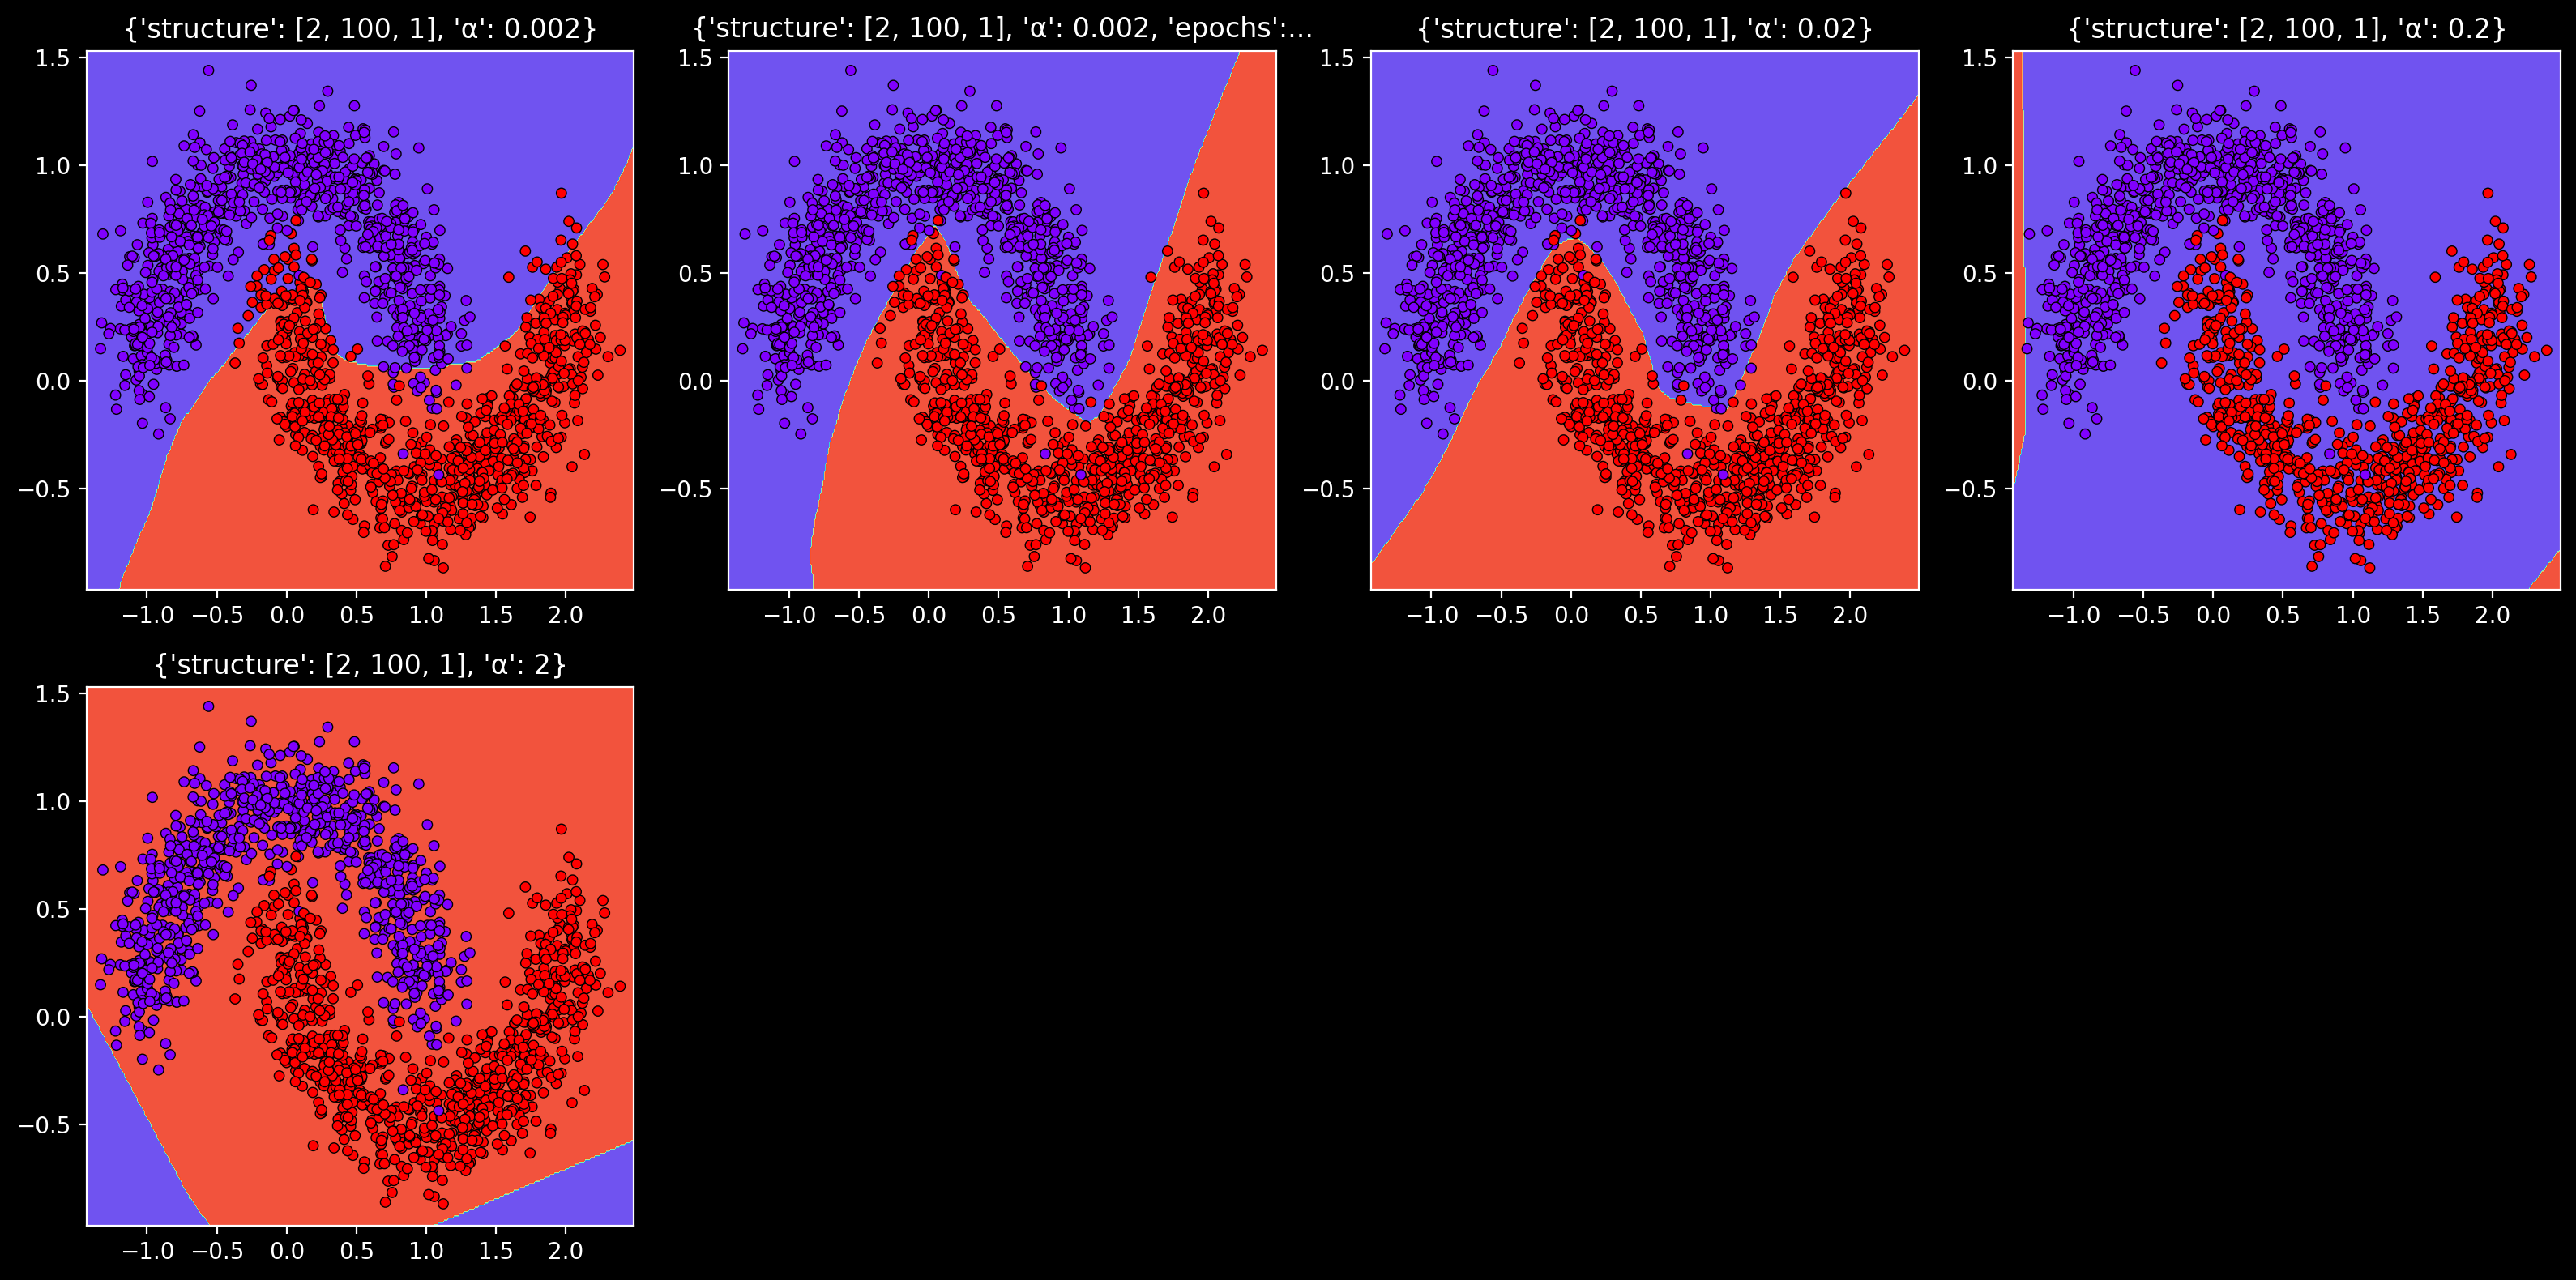

In [9]:
from Plot import plot_model_contours

hyperparameter_list = [
    {"structure": [2, 100, 1], "α": 0.002},
    {"structure": [2, 100, 1], "α": 0.002, "epochs": 100},
    {"structure": [2, 100, 1],  "α": 0.02},
    {"structure": [2, 100, 1],  "α": 0.2},
    {"structure": [2, 100, 1],  "α": 2},
]

plot_model_contours(ClassificationNeuralNet, x_train, y_train, hyperparams_list=hyperparameter_list)

```python
Explain why each of 0.002, 0.2 and 2 are not ideal learning rates.
```


In [ ]:
'''
o.002 is to small 
0.02 may overshot
2 is Divergence 
'''

### ⭐ Analyzing Batch Size


Hyperparameters:  40%|████      | 2/5 [00:16<00:24,  8.16s/it]e:\NN_University\Lab 6\Backprop.py:14: RuntimeWarning: overflow encountered in exp
  def σ(z): return 1/(1+np.exp(-z))
e:\NN_University\Lab 6\Backprop.py:105: RuntimeWarning: overflow encountered in add
  მJⳆმBₙ[l] += მJⳆმBₙₘ[l]
e:\NN_University\Lab 6\Backprop.py:106: RuntimeWarning: overflow encountered in add
  მJⳆმWₙ[l] += მJⳆმWₙₘ[l]
e:\NN_University\Lab 6\Backprop.py:54: RuntimeWarning: invalid value encountered in add
  z = W@a+b
e:\NN_University\Lab 6\Backprop.py:54: RuntimeWarning: invalid value encountered in matmul
  z = W@a+b
Hyperparameters:  60%|██████    | 3/5 [00:24<00:15,  7.73s/it]e:\NN_University\Lab 6\Backprop.py:54: RuntimeWarning: overflow encountered in matmul
  z = W@a+b
e:\NN_University\Lab 6\Backprop.py:81: RuntimeWarning: overflow encountered in multiply
  δ = (Aₙ[l] - yₘ) if l==H else np.dot(self.Wₙ[l+1].T, δ) * self.h(Zₙ[l])
e:\NN_University\Lab 6\Backprop.py:106: RuntimeWarning: invalid value enco

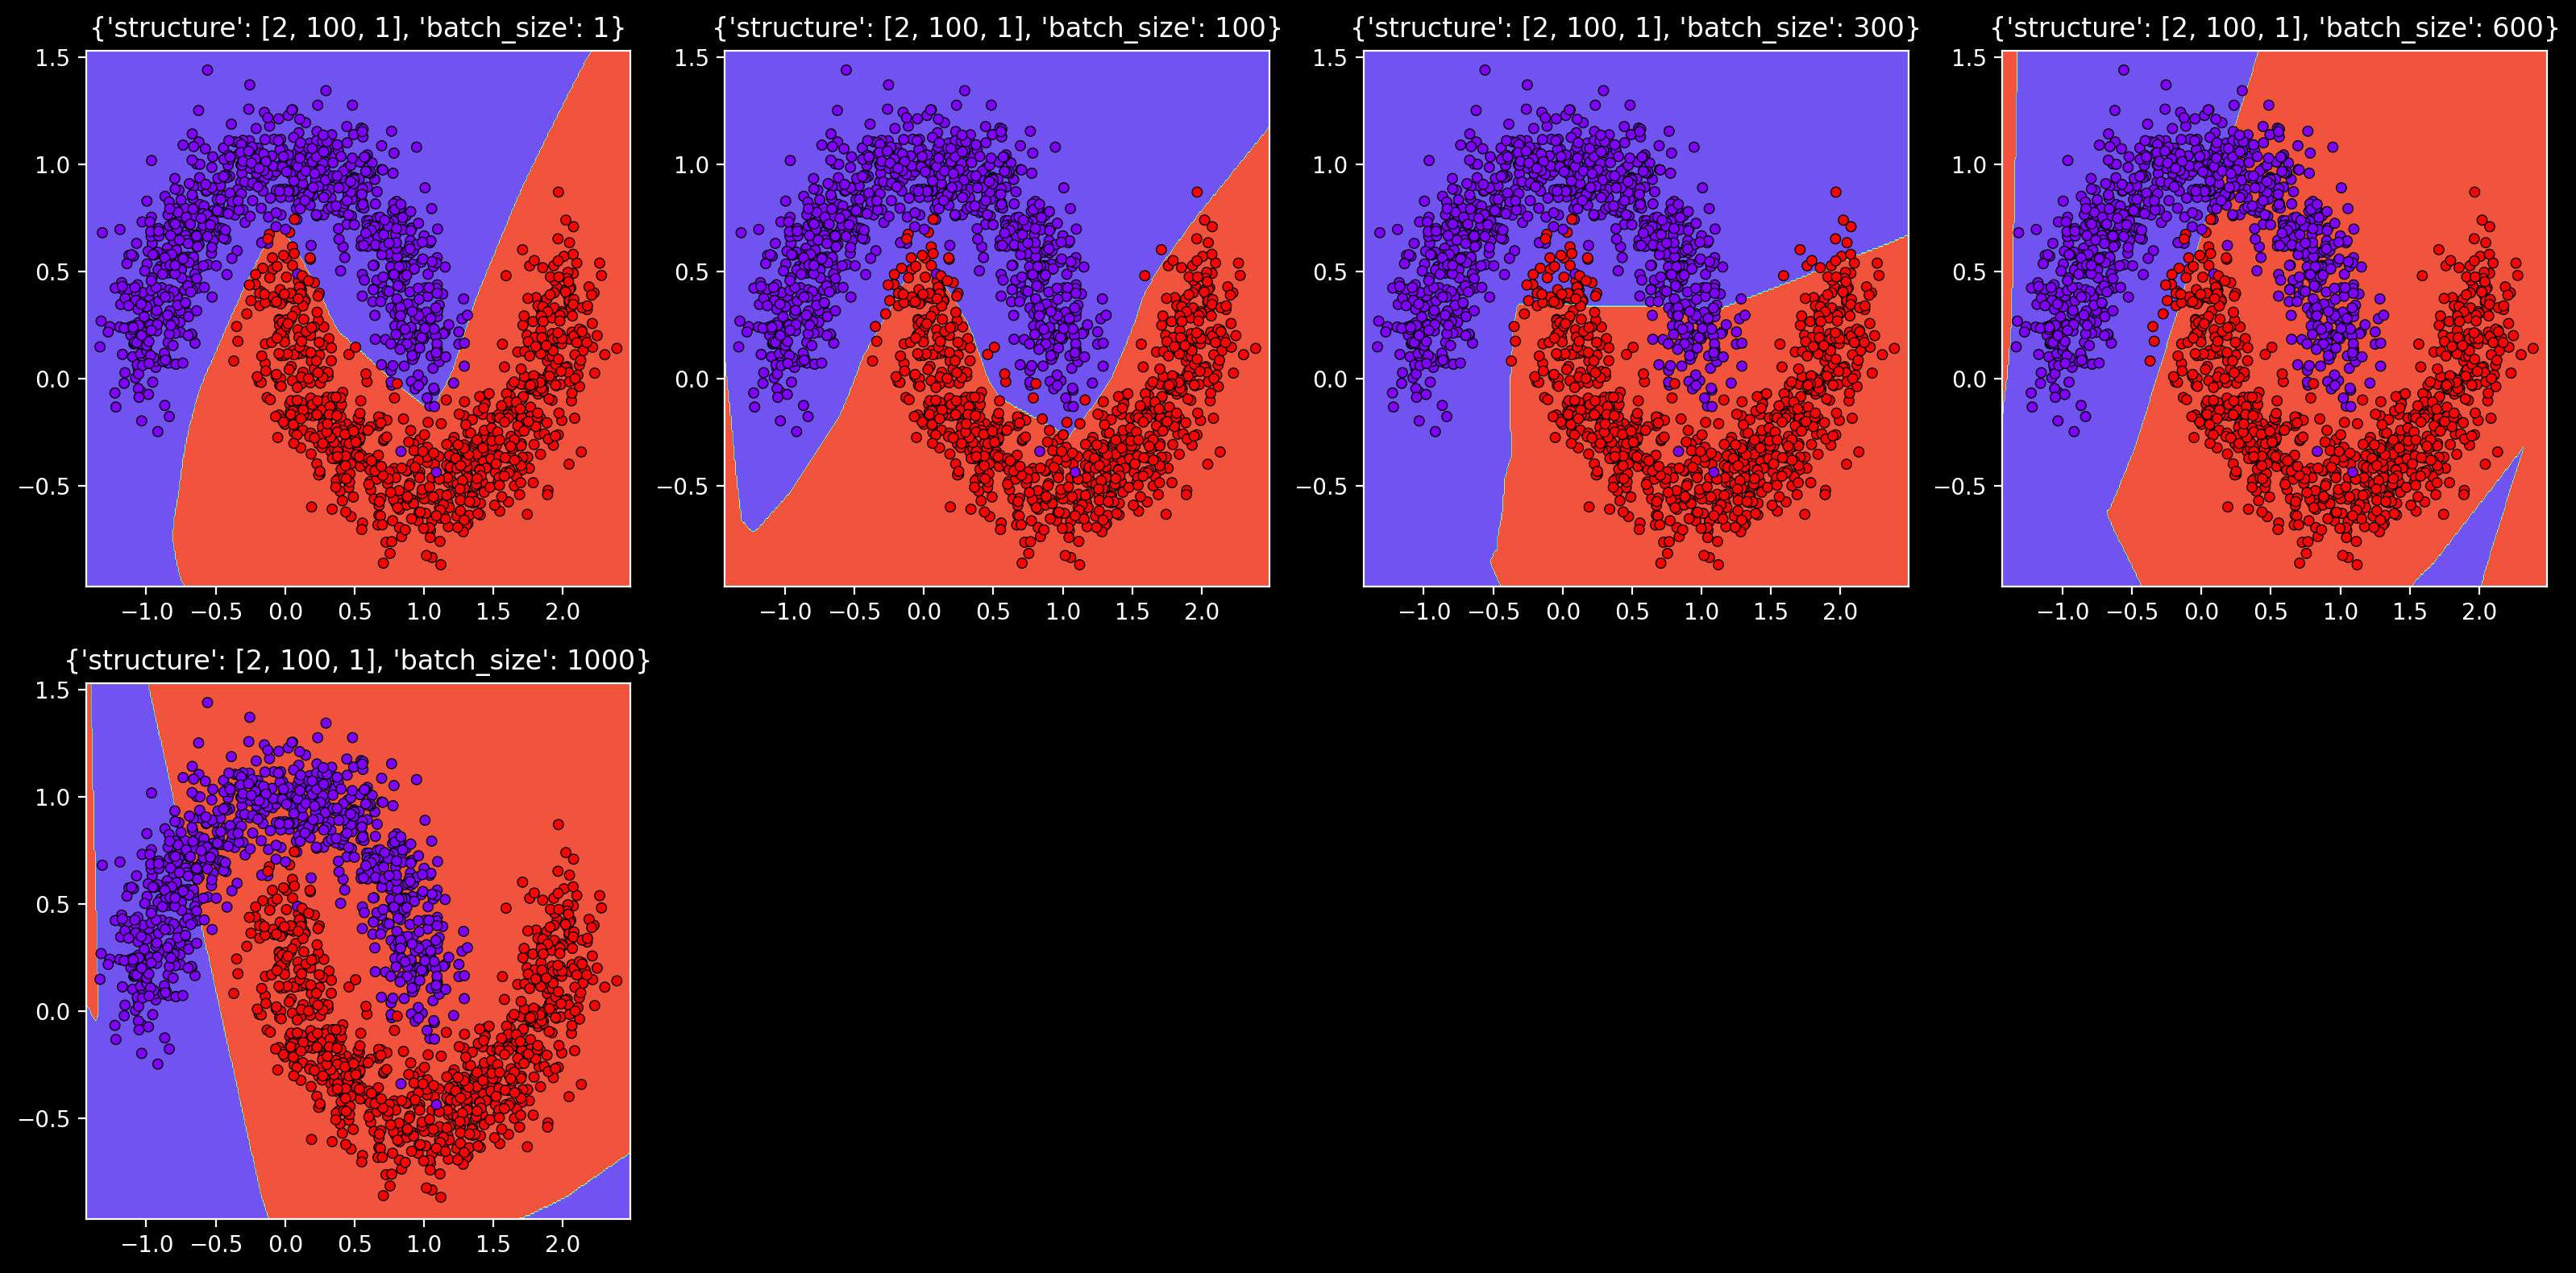

In [10]:
from Plot import plot_model_contours

hyperparameter_list = [
    {"structure": [2, 100, 1], "batch_size": 1},
    {"structure": [2, 100, 1], "batch_size": 100},
    {"structure": [2, 100, 1],  "batch_size": 300},
    {"structure": [2, 100, 1],  "batch_size": 600},
    {"structure": [2, 100, 1],  "batch_size": 1000,}
]

plot_model_contours(ClassificationNeuralNet, x_train, y_train, hyperparams_list=hyperparameter_list)

```python
The network converges to a pooerer minimum in the same number of epochs for larger batch size. Read the abstract of this paper and justify:
```

[Paper Link](https://arxiv.org/abs/1609.04836)


In [ ]:
'''
Answer goes here
'''